# Poisson regression examples

The code I used in this example comes from [link](https://www.dataquest.io/blog/tutorial-poisson-regression-in-r/)

Another very good example comes from [link](https://stats.idre.ucla.edu/r/dae/poisson-regression/)

In [47]:
library(datasets) # include library datasets after installation
data=warpbreaks
columns=names(data)
library(arm)
library(interactions)
# install.packages("jtools")
# install.packages("broom")
# install.packages("ggstance")

library(jtools)
library(broom)
library(ggstance)

str(warpbreaks)
poisson.model=glm(breaks ~ wool + tension, data, family = poisson(link = "log"))
# hist(data$breaks)
summary(poisson.model)



'data.frame':	54 obs. of  3 variables:
 $ breaks : num  26 30 54 25 70 52 51 26 67 18 ...
 $ wool   : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ tension: Factor w/ 3 levels "L","M","H": 1 1 1 1 1 1 1 1 1 2 ...



Call:
glm(formula = breaks ~ wool + tension, family = poisson(link = "log"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6871  -1.6503  -0.4269   1.1902   4.2616  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.69196    0.04541  81.302  < 2e-16 ***
woolB       -0.20599    0.05157  -3.994 6.49e-05 ***
tensionM    -0.32132    0.06027  -5.332 9.73e-08 ***
tensionH    -0.51849    0.06396  -8.107 5.21e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 297.37  on 53  degrees of freedom
Residual deviance: 210.39  on 50  degrees of freedom
AIC: 493.06

Number of Fisher Scoring iterations: 4


In [48]:
poisson.model2=glm(breaks ~ wool + tension, data = data, family = quasipoisson(link = "log"))
summary(poisson.model2)


Call:
glm(formula = breaks ~ wool + tension, family = quasipoisson(link = "log"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.6871  -1.6503  -0.4269   1.1902   4.2616  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.69196    0.09374  39.384  < 2e-16 ***
woolB       -0.20599    0.10646  -1.935 0.058673 .  
tensionM    -0.32132    0.12441  -2.583 0.012775 *  
tensionH    -0.51849    0.13203  -3.927 0.000264 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 4.261537)

    Null deviance: 297.37  on 53  degrees of freedom
Residual deviance: 210.39  on 50  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 4


In [49]:
# extract coefficients from first model using 'coef()'
coef1 = coef(poisson.model)

# extract coefficients from second model
coef2 = coef(poisson.model2)

# extract standard errors from first model using 'se.coef()'
se.coef1 = se.coef(poisson.model)

# extract standard errors from second model
se.coef2 = se.coef(poisson.model2)

# use 'cbind()' to combine values into one dataframe
models.both =cbind(coef1, se.coef1, coef2, se.coef2, exponent = exp(coef1))

# show dataframe
models.both

,coef1,se.coef1,coef2,se.coef2,exponent
(Intercept),3.6919631,0.04541069,3.6919631,0.09374352,40.1235380
woolB,-0.2059884,0.05157117,-0.2059884,0.10646089,0.8138425
tensionM,-0.3213204,0.06026580,-0.3213204,0.12440965,0.7251908
tensionH,-0.5184885,0.06395944,-0.5184885,0.13203462,0.5954198


In [50]:
newdata = data.frame(wool = "B", tension = "M")

# use 'predict()' to run model on new data
predict(poisson.model2, newdata = newdata, type = "response")

1 
23.68056

In [55]:
library(jtools)

# plot_summs(poisson.model2, scale = TRUE, exp = TRUE)

In [56]:
# plot_summs(poisson.model, poisson.model2, scale = TRUE, exp = TRUE)


In [57]:
# cat_plot(poisson.model2, pred = tension, modx = wool, geom = "line")


Warning message:
“tension and wool are not included in an interaction with one another in the
model.”

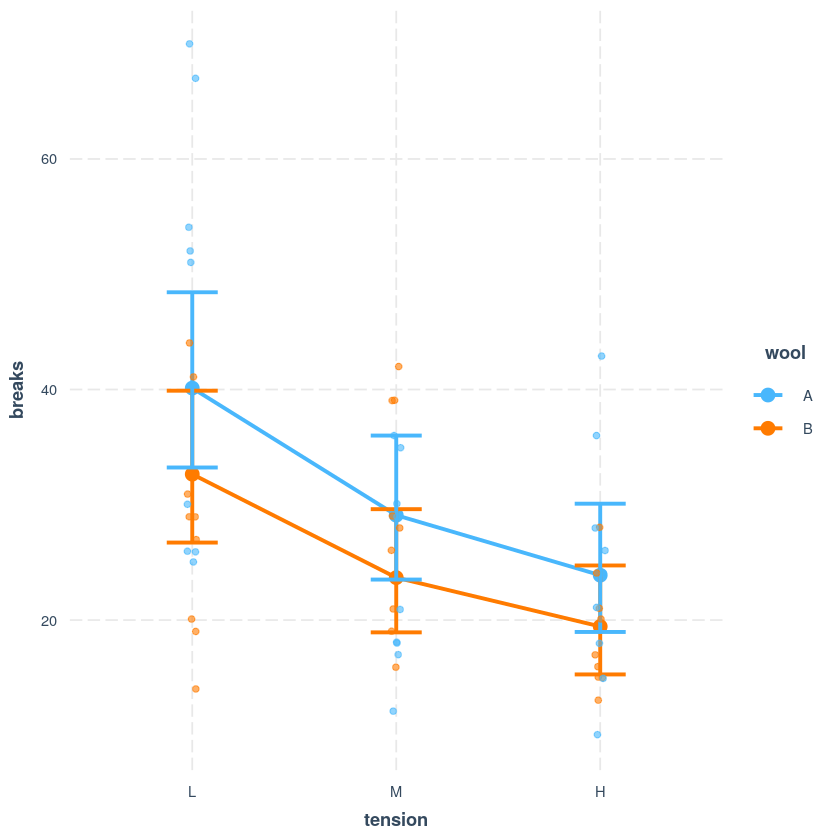

In [54]:
cat_plot(poisson.model2, pred = tension, modx = wool, geom = "line", plot.points = TRUE)
